In [1]:
#imports and set up 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

%matplotlib notebook

In [2]:
#load data
my_date_parser = lambda x: pd.to_datetime(x, format='%Y-%m-%d')
to_c = lambda x: 5*(x-32)/9
ann_arbor = pd.read_csv('data/2192437.csv', usecols = [5,6,7])
ann_arbor['DATE']=ann_arbor['DATE'].apply(my_date_parser)
ann_arbor['TMAX']=ann_arbor['TMAX'].apply(to_c)
ann_arbor['TMIN']= ann_arbor['TMIN'].apply(to_c)
ann_arbor['Mean']=(ann_arbor['TMAX']+ann_arbor['TMIN'])/2
df_global = pd.read_csv('data/monthly_csv.csv')
df_global = df_global[df_global['Source']!='GCAG'] # drop GCAG data
df_global['Date']= df_global['Date'].apply(my_date_parser) # convert dates to datetime
df_global.rename(columns={'Date':'DATE'}, inplace=True)

In [3]:
#functions
def monthly_mean(x):
    ''' takes a time series data frame and returns a dataframe of months and means'''
    #out_ = {}
    x['month'] = x['DATE'].apply(lambda x: x.month)
    x_ = x.groupby('month').mean()
    return x_
    
    
def annual_means(x):
    x['year'] = x['DATE'].apply(lambda x: x.year)
    x_ = x.groupby('year').mean()
    return x_


In [4]:
#calculate annual means
a_means = annual_means(ann_arbor) #annual mean temps for ann_arbor
thresh = a_means.loc[1951:1980].mean() #30 year mean as threshold
df_means = annual_means(df_global)
start_ = 1892
end_=2016

#align years for both data sets
a_means = a_means.loc[start_:end_]
df_means = df_means.loc[start_:end_]


<IPython.core.display.Javascript object>


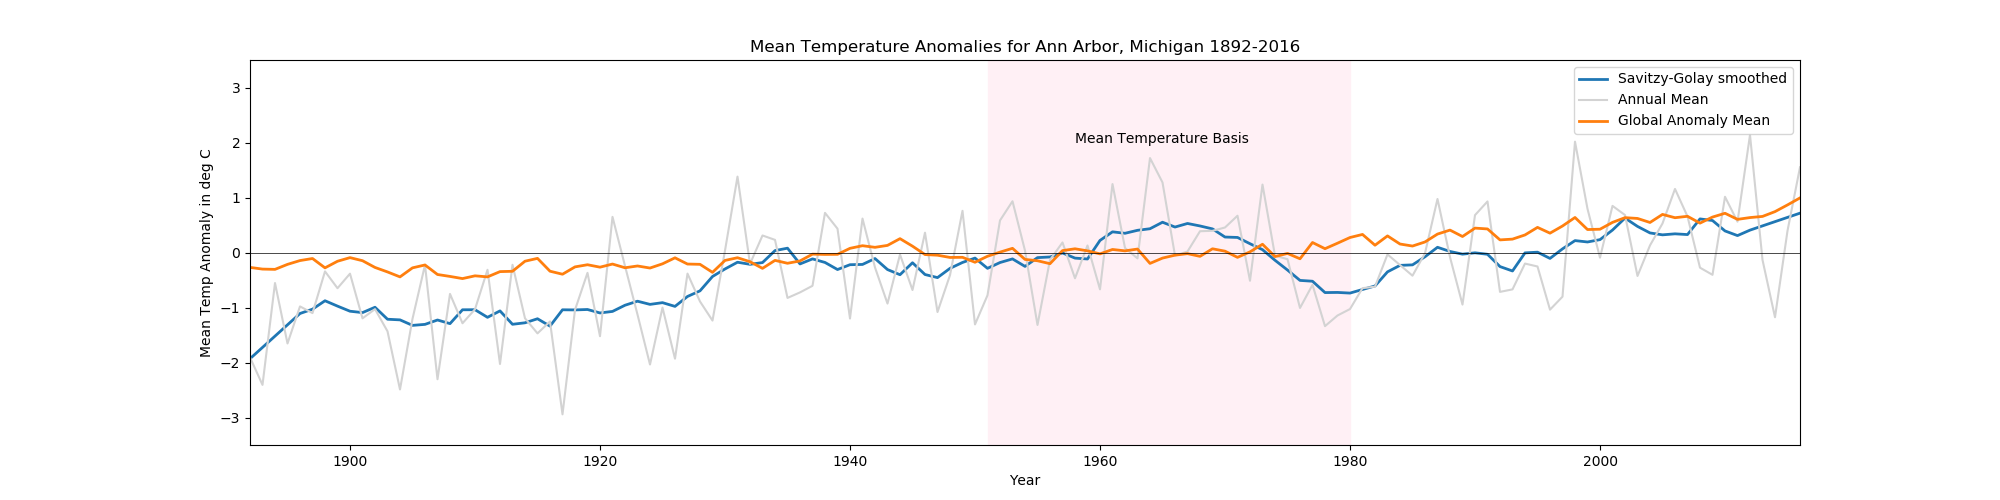

In [5]:
#Plot
fig, ax = plt.subplots(figsize=(20,5))
a_means['adj_mean']=a_means['Mean']-thresh['Mean']

smoothed_a = savgol_filter(a_means['adj_mean'], 9,1)
plt.plot(a_means.index, smoothed_a, label = 'Savitzy-Golay smoothed', linewidth=2)
plt.plot(a_means.index, a_means['adj_mean'], color ='lightgrey', label = 'Annual Mean')
plt.plot(df_means.index, df_means['Mean'], label = 'Global Anomaly Mean', linewidth=2)
plt.xlim(start_, end_)
plt.ylim(-3.5, 3.5)
plt.title('Mean Temperature Anomalies for Ann Arbor, Michigan 1892-2016')
plt.ylabel('Mean Temp Anomaly in deg C')
plt.xlabel('Year')
plt.axhline(0,0,1, color = 'black', linewidth=0.5)
plt.legend()
plt.axvspan(1951, 1980, color = 'lavenderblush')
plt.annotate('Mean Temperature Basis', (1958,2))
plt.show()